<a href="https://colab.research.google.com/github/ajmllr/Predicting_Stock_Prices_with_LSTM/blob/master/data_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from alpha_vantage.timeseries import TimeSeries
import os
import sched, time
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd


mpl.rcParams['axes.grid'] = False

In [0]:


# Change key below at https://www.alphavantage.co/

API_KEY = 'YOUR KEY'

def get_stock_data(symbol='MSFT', time_window='daily', save=True):

    ts = TimeSeries(key=API_KEY, output_format='pandas')

    if time_window == 'intraday':
        data, meta_data = ts.get_intraday(
            symbol=symbol, interval='1min', outputsize='full')
    elif time_window == 'daily':
        data, meta_data = ts.get_daily_adjusted(symbol, outputsize='full')
    elif time_window == '?':
        data, meta_data = ts.get_daily_adjusted(symbol, outputsize='full')

    if save:
        data.to_csv(f'./data/{symbol}_{time_window}.csv')

    return data

def update_stocks(stocks):
    s = sched.scheduler(time.time, time.sleep)

    def save(sc, i):
        if i < len(stocks):
            get_stock_data(stocks[i])
        i = i + 1
        s.enter(15, 1, save, (sc, i))
        
    s.enter(12, 1, save, (s, 0))
    s.run()

def rename_file(src, dst):
    if os.path.isfile(src):
        os.rename(src, dst)
    else:
        print(src)

def rename_stocks(stocks):
    for arr in stocks: 
        symbol = arr[0]
        src = f'./data/{symbol}_daily_adj.csv'

        if os.path.isfile(src):
            os.rename(src, f'./data/{symbol}_daily.csv')
        else:
            print(symbol)

In [0]:
symbol = 'MSFT'
time_window='daily'
features=['1. open', '2. high', '3. low', '4. close', '5. adjusted close', '6. volume']

df = pd.read_csv(f'./data/{symbol}_{time_window}.csv')

data = df[features]
data.index = df['date']
print(data.head())

1. open  2. high  3. low  4. close  5. adjusted close   6. volume
date                                                                         
2020-03-06  162.610   163.11  156.00    161.57             161.57  72821057.0
2020-03-05  166.045   170.87  165.69    166.27             166.27  47817251.0
2020-03-04  168.485   170.70  165.62    170.55             170.55  49814383.0
2020-03-03  173.800   175.00  162.26    164.51             164.51  71677019.0
2020-03-02  165.310   172.92  162.31    172.79             172.79  71030810.0


In [0]:
# Single Stock Describe Values
data = pd.DataFrame(data.values, 
                             columns=['open', 'high', 'low', 'close', 'adj close', 'volume'], 
                             index=data.index)

print(simple_columns.describe())

open         high          low        close    adj close  \
count  5033.000000  5033.000000  5033.000000  5033.000000  5033.000000   
mean     47.866831    48.377130    47.348709    47.870617    37.197773   
std      30.845478    31.122631    30.514607    30.840626    32.407435   
min      15.200000    15.620000    14.870000    15.150000    11.701900   
25%      26.940000    27.170000    26.750000    26.950000    19.048200   
50%      32.185000    32.550000    31.950000    32.200000    22.347200   
75%      58.630000    59.540000    57.820000    58.300000    41.140000   
max     190.650000   190.700000   186.470000   188.700000   188.187500   

             volume  
count  5.033000e+03  
mean   4.923766e+07  
std    2.846904e+07  
min    5.850800e+06  
25%    2.969920e+07  
50%    4.440570e+07  
75%    6.134370e+07  
max    5.910522e+08  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0911A7F08>,
      dtype=object)

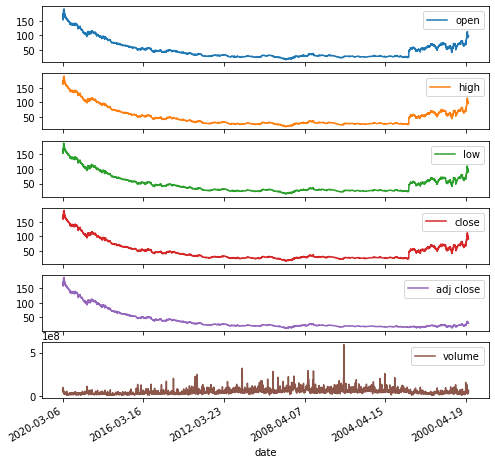

In [0]:
#Single Stock Plot Values

mpl.rcParams['figure.figsize'] = (8, 8)
data.plot(subplots=True)

In [0]:
#Single Stock Normalized

norm = pd.DataFrame(tf.keras.utils.normalize(data.values, axis=0, order=2), 
                             columns=data.columns, 
                             index=data.index)
norm.astype(int)
print(norm.head())

open      high       low     close  adj close    volume
date                                                                   
2020-03-06  0.040253  0.039970  0.039038  0.039995   0.046165  0.018048
2020-03-05  0.041103  0.041872  0.041463  0.041158   0.047508  0.011851
2020-03-04  0.041707  0.041830  0.041445  0.042218   0.048731  0.012346
2020-03-03  0.043023  0.042884  0.040604  0.040723   0.047005  0.017764
2020-03-02  0.040921  0.042374  0.040617  0.042772   0.049371  0.017604


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000224D7592EC8>,
      dtype=object)

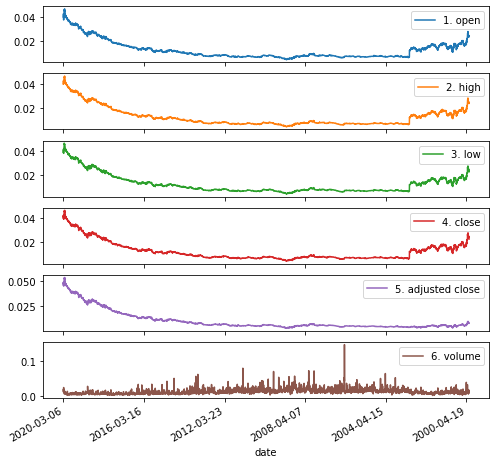

In [0]:
#Single Stock Normalized Plot

norm.plot(subplots=True)

In [0]:
print(norm.describe())

open         high          low        close    adj close  \
count  5033.000000  5033.000000  5033.000000  5033.000000  5033.000000   
mean      0.011849     0.011855     0.011849     0.011850     0.010628   
std       0.007636     0.007627     0.007636     0.007634     0.009260   
min       0.003763     0.003828     0.003721     0.003750     0.003344   
25%       0.006669     0.006658     0.006694     0.006671     0.005443   
50%       0.007967     0.007976     0.007995     0.007971     0.006385   
75%       0.014513     0.014590     0.014469     0.014432     0.011755   
max       0.047194     0.046731     0.046663     0.046711     0.053770   

            volume  
count  5033.000000  
mean      0.012203  
std       0.007056  
min       0.001450  
25%       0.007361  
50%       0.011006  
75%       0.015203  
max       0.146486  
